In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/Soft computing project/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df=df.rename(columns={'weathersit':'weather',
                     'yr':'year',
                     'mnth':'month',
                     'hr':'hour',
                     'cnt':'count',
                     'hum':'humidity'})

In [5]:
df=df.drop(columns={'instant','dteday','year'})

In [6]:
cols=['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
  df[col]=df[col].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


**DATA ANALYSIS (VISUALIZATION)**

[Text(0.5, 1.0, 'Count of Bikes during weekdays and weekend')]

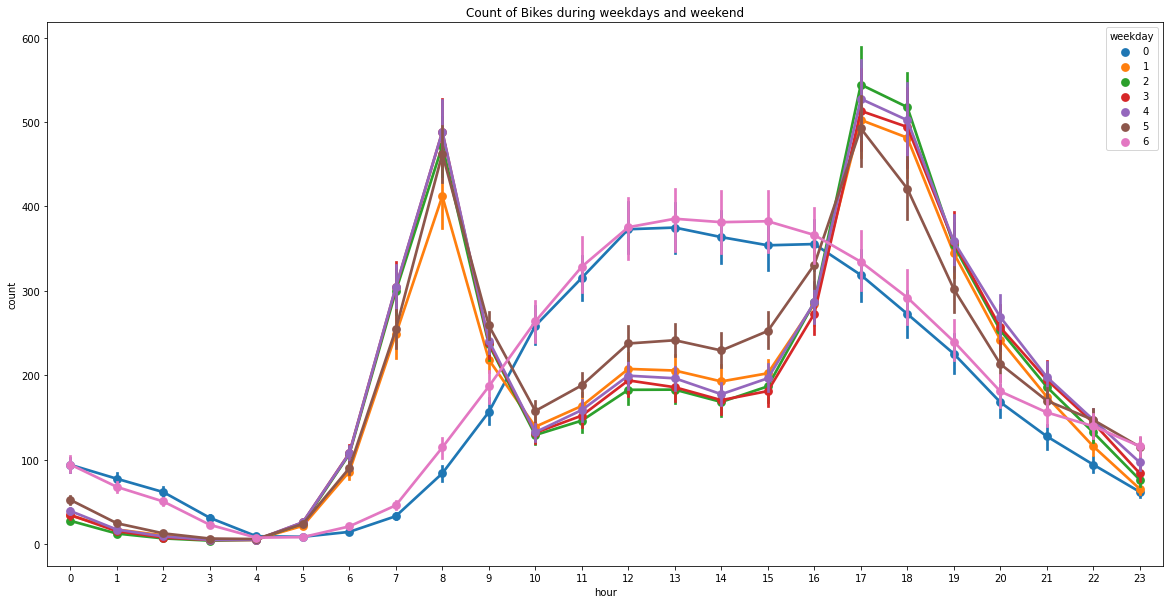

In [8]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count',hue='weekday',ax=ax)
ax.set(title='Count of Bikes during weekdays and weekend')

[Text(0.5, 1.0, 'Count of Bikes during weekdays and weekendof Unregistered users')]

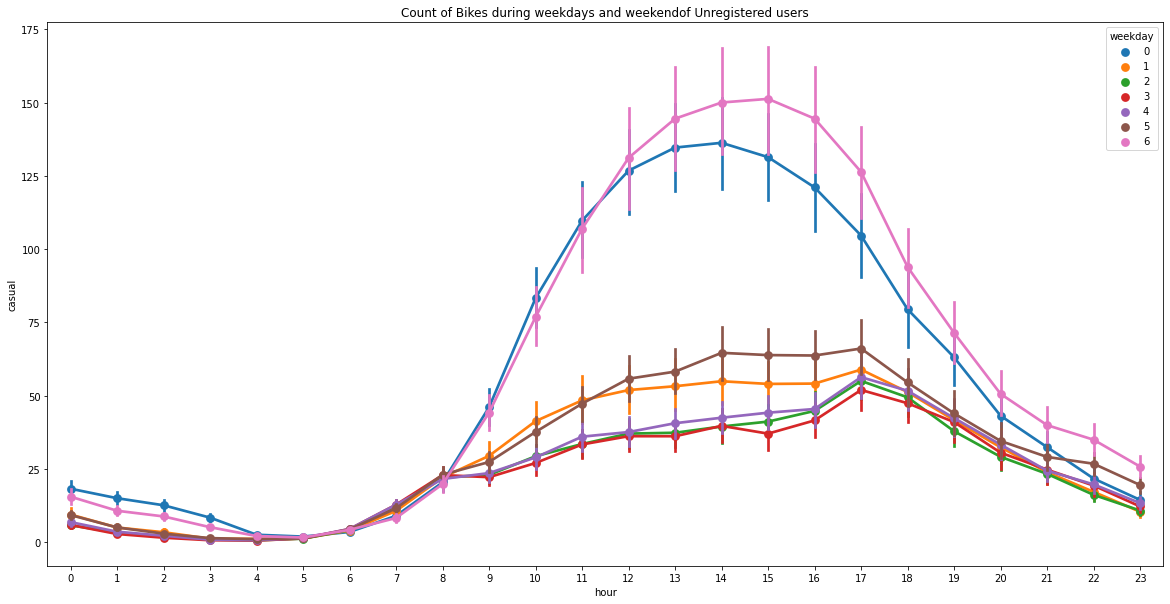

In [9]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='casual',hue='weekday',ax=ax)
ax.set(title='Count of Bikes during weekdays and weekendof Unregistered users')

[Text(0.5, 1.0, 'Count of Bikes during weekdays and weekend of Registered users')]

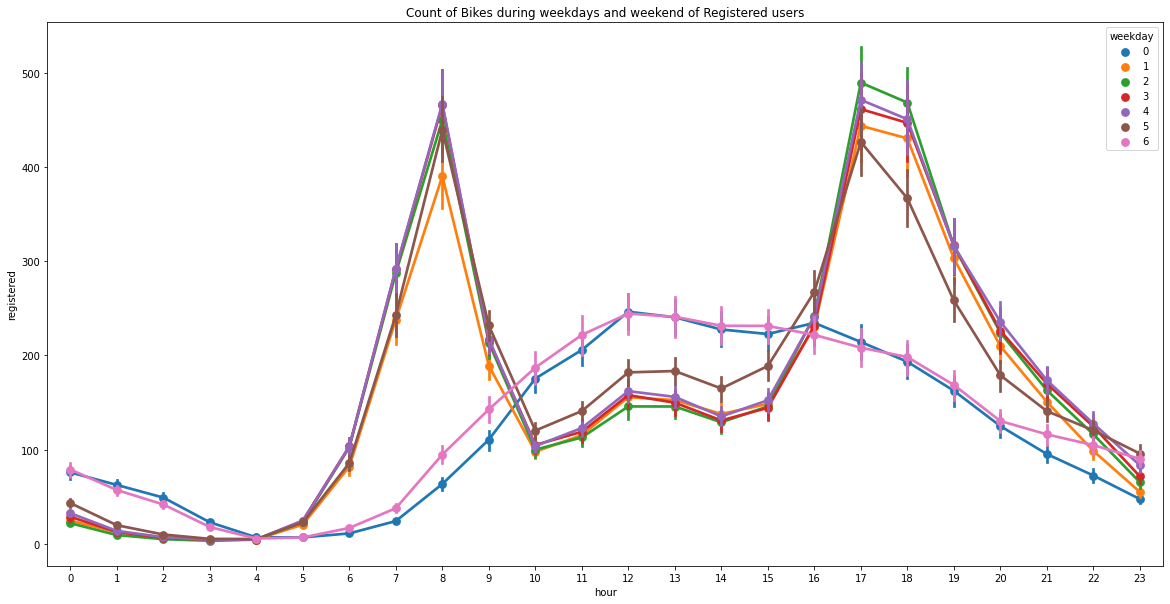

In [10]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='registered',hue='weekday',ax=ax)
ax.set(title='Count of Bikes during weekdays and weekend of Registered users')

[Text(0.5, 1.0, 'Count of Bikes during diffrent weather')]

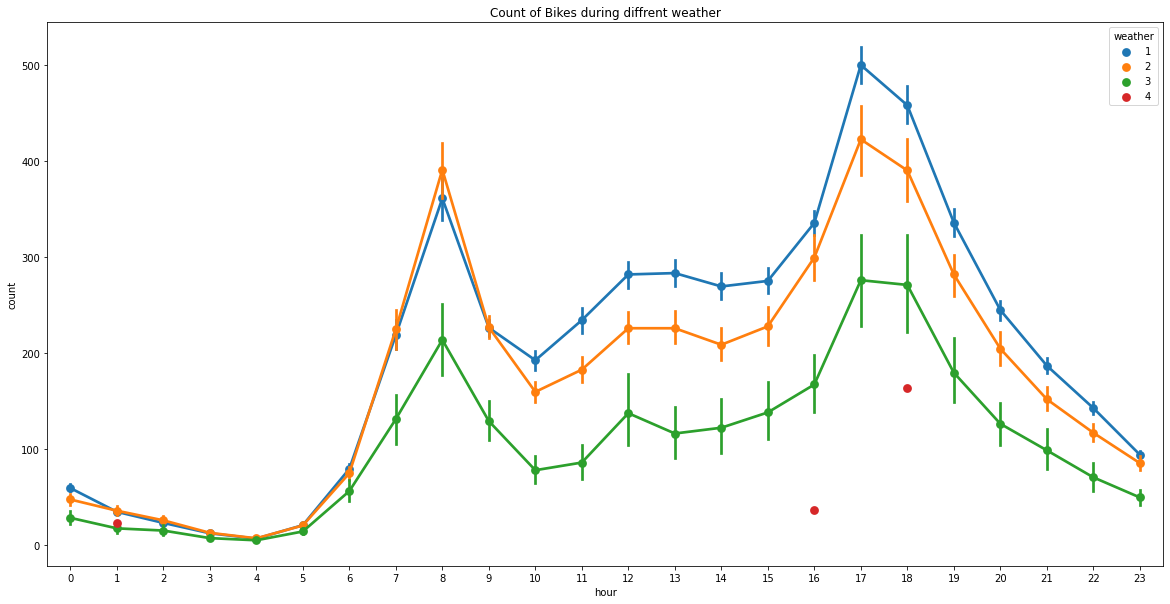

In [11]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count',hue='weather',ax=ax)
ax.set(title='Count of Bikes during diffrent weather')

[Text(0.5, 1.0, 'Count of Bikes during diffrent season')]

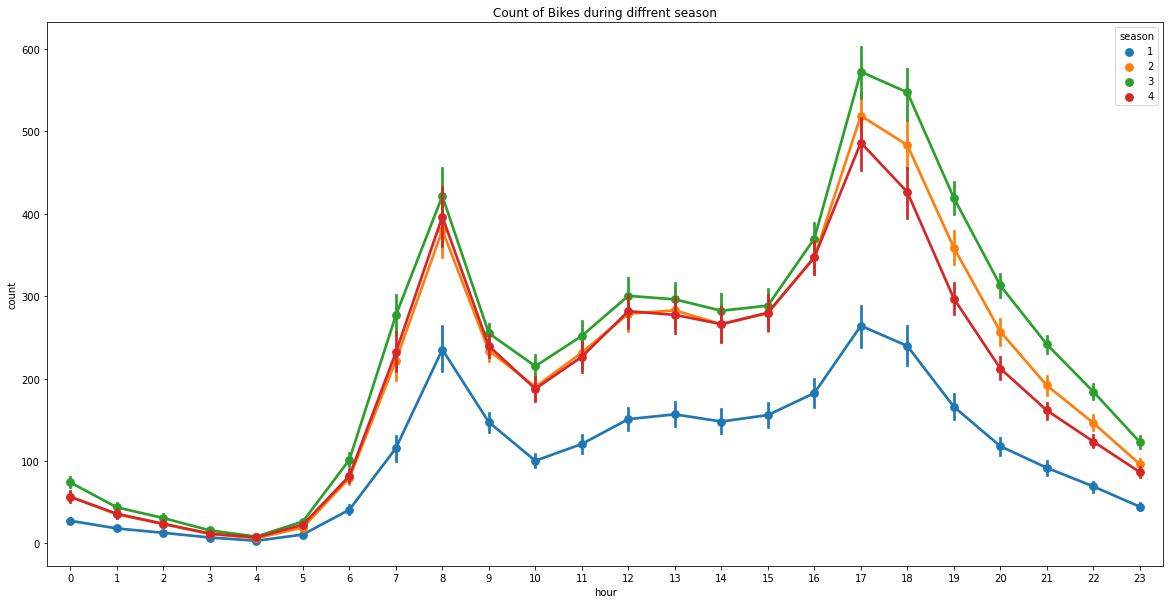

In [12]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count',hue='season',ax=ax)
ax.set(title='Count of Bikes during diffrent season')

[Text(0.5, 1.0, 'Count of Bikes in diffrent months')]

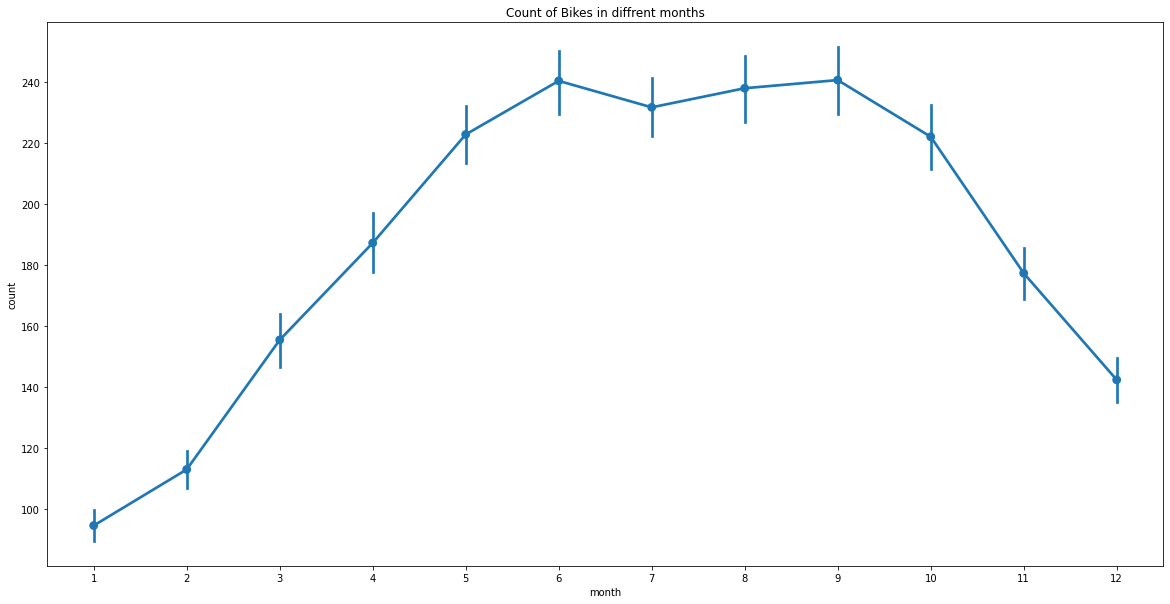

In [13]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='month', y='count',ax=ax)
ax.set(title='Count of Bikes in diffrent months')

[Text(0.5, 1.0, 'Count of Bikes in diffrent days')]

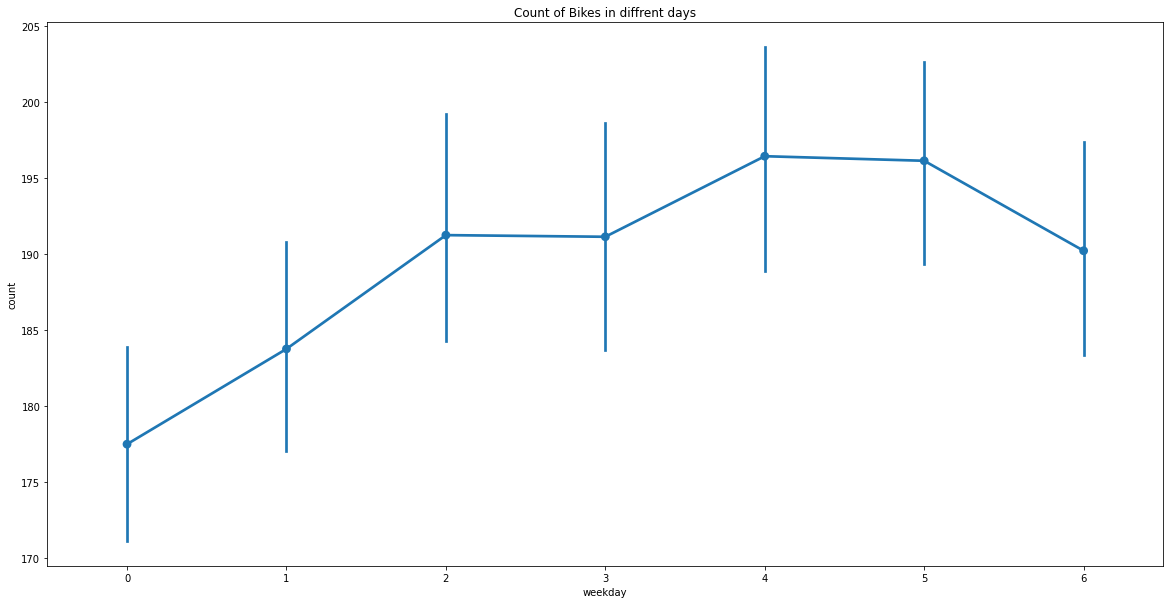

In [14]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='weekday', y='count',ax=ax)
ax.set(title='Count of Bikes in diffrent days')

[Text(0.5, 1.0, 'relation between humidity and users')]

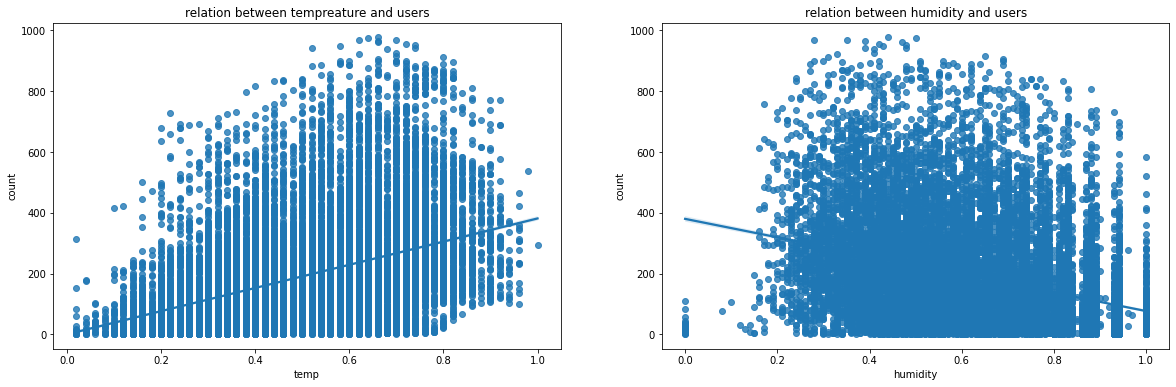

In [19]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=df['temp'],y=df['count'],ax=ax1)
ax1.set(title="relation between tempreature and users")
sns.regplot(x=df['humidity'],y=df['count'],ax=ax2)
ax2.set(title="relation between humidity and users")

[Text(0.5, 1.0, 'Theoritical quantities')]

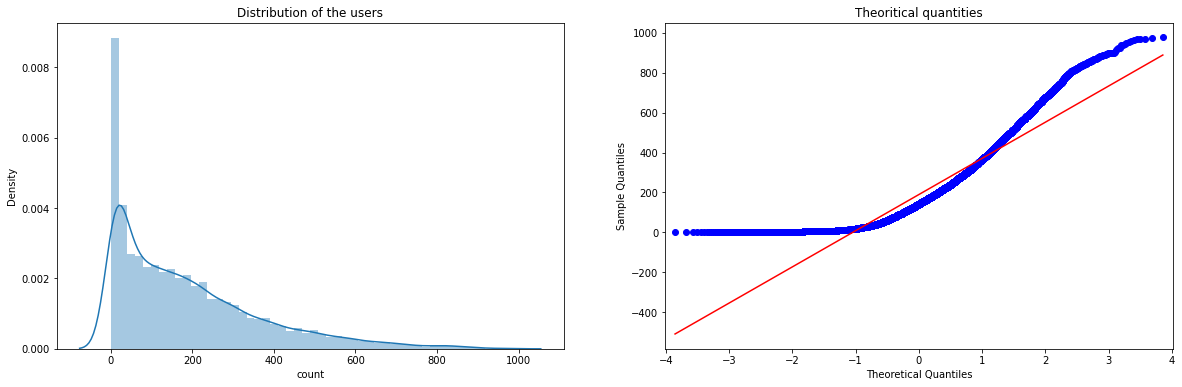

In [22]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(df['count'],ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'],ax=ax2,line='s')
ax2.set(title='Theoritical quantities')

In [23]:
df['count']=np.log(df['count'])

[Text(0.5, 1.0, 'Theoritical quantities')]

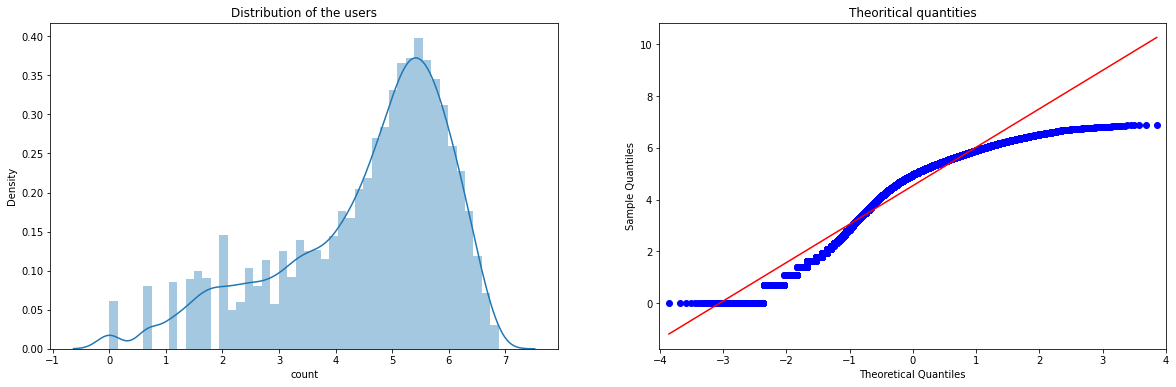

In [24]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(df['count'],ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'],ax=ax2,line='s')
ax2.set(title='Theoritical quantities')

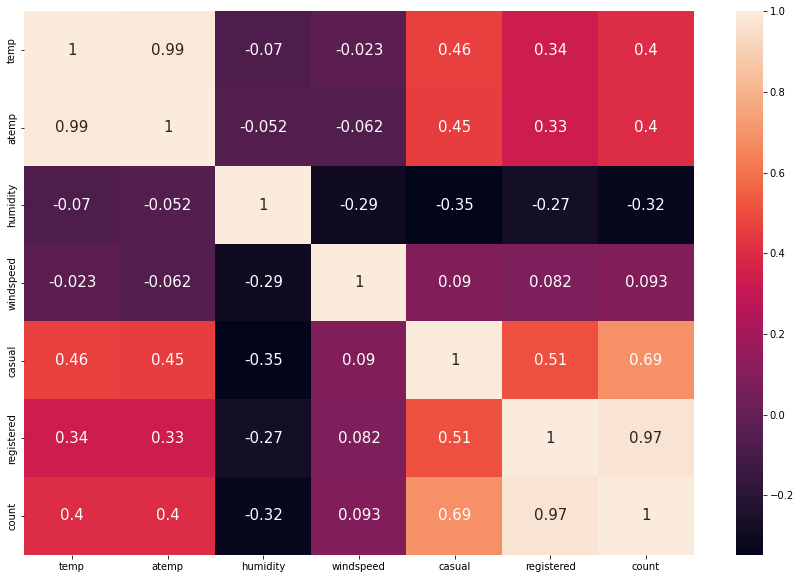

In [17]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True,annot_kws={'size':15})

In [25]:
df.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,2.772589
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,3.688879
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,3.465736
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,2.564949
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,0.000000


In [26]:
df_oh=df
def one_hot_encoding(data,column):
  data=pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)], axis=1)
  data=data.drop([column],axis=1)
  return data

cols=['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
  df_oh=one_hot_encoding(df_oh,col)

df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
x=df_oh.drop(columns=['atemp','windspeed','casual','registered','count'],axis=1)
y=df_oh['count']

**MODEL SELECTION AND TRAINING**

In [48]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.kernel_ridge import KernelRidge




models=[LinearRegression(),
        SGDRegressor(),
        Ridge(),
        HuberRegressor(),
        ElasticNetCV(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        ExtraTreesRegressor(),
        LGBMRegressor(),
        XGBRegressor(),
        GradientBoostingRegressor()]

In [49]:
from sklearn import model_selection
def train(model):
  kfold=model_selection.KFold(n_splits=5 )
  pred=model_selection.cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')
  cv_score=pred.mean()
  print('Modle:',model)
  print('CV score:',abs(cv_score))

In [50]:
for model in models:
  train(model)
  

Modle: LinearRegression()
CV score: 0.6313301520117317
Modle: SGDRegressor()
CV score: 0.6190974743801606
Modle: Ridge()
CV score: 0.6304079414191435
Modle: HuberRegressor()
CV score: 0.6603309580871269
Modle: ElasticNetCV()
CV score: 0.6252222784219456
Modle: DecisionTreeRegressor()
CV score: 0.6051335761442114
Modle: RandomForestRegressor()
CV score: 0.38748714059588396
Modle: ExtraTreesRegressor()
CV score: 0.40351681537681927
Modle: LGBMRegressor()
CV score: 0.3571782187835454
[14:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:36:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:36

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [59]:
model = LGBMRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

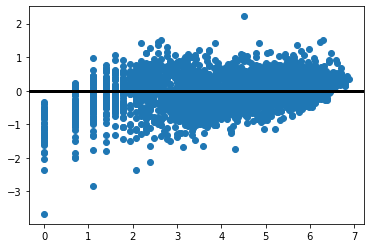

In [60]:
error= y_test-y_pred
fig,ax=plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color='black')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.43651539010850526